## Data Cleaning and Plotting in Python

#### About Dataset


The data is succesfully scrapped from imdb top netflix movies and tvshows.This dataset need clever programming knowledge for feature extraction also you can build a RECOMMENDATION system either GENRE prediction model



In [ ]:
#Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Open a csv file
df = pd.read_csv('movies.csv')
#Check the info of the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [3]:
#Overview of the table
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
#Make proper column 
df.columns = map(str.title, df.columns)
df.head()

,Movies,Year,Genre,Rating,One-Line,Stars,Votes,Runtime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [5]:
#Remove duplicates
df = df.drop_duplicates()
df.shape

(9568, 9)

In [6]:
#Remove White Spaces in columns
df.columns.str.strip()

Index(['Movies', 'Year', 'Genre', 'Rating', 'One-Line', 'Stars', 'Votes',
       'Runtime', 'Gross'],
      dtype='object')

In [7]:
#Remove unnessary columns
to_drop = ['One-Line', 'Stars', 'Gross']
df = df.drop(to_drop, axis = 1)
df.head()

,Movies,Year,Genre,Rating,Votes,Runtime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,NaN,NaN


In [8]:
#Remove special characters 
df['Year'] = df['Year'].str.replace('[^a-zA-Z0-9]', '')
df['Genre'] = df['Genre'].str.replace('\n','')
df['Votes'] = df['Votes'].str.replace('\n', '')
df['Runtime'] = df['Runtime'].replace('\n', '').astype(float)
df['Votes'] = df['Votes'].str.replace(',','').astype(float)
df

,Movies,Year,Genre,Rating,Votes,Runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,21062.0,121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,17870.0,25.0
2,The Walking Dead,20102022,"Drama, Horror, Thriller",8.2,885805.0,44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,414849.0,23.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,NaN,NaN
...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,NaN,NaN


In [9]:
#Organize the Date column to 4 digit year
df['Year'] = df['Year'].str.extract(r'^(\d{4})', expand = False)
df.head()

,Movies,Year,Genre,Rating,Votes,Runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,21062.0,121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,17870.0,25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,885805.0,44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,414849.0,23.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,NaN,NaN


In [10]:
#Split the multiple genre into column
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(',', expand = True)
df

,Movies,Year,Genre,Rating,Votes,Runtime,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,21062.0,121.0,Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,17870.0,25.0,Animation,Action,Adventure
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,885805.0,44.0,Drama,Horror,Thriller
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,414849.0,23.0,Animation,Adventure,Comedy
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,NaN,NaN,Action,Crime,Horror
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,NaN,NaN,Drama,Thriller,None
9995,Arcane,2021,"Animation, Action, Adventure",NaN,NaN,NaN,Animation,Action,Adventure
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,NaN,NaN,Documentary,Sport,None
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,NaN,NaN,Adventure,Drama,Fantasy


In [11]:
#Dropping the original genre column
df = df.drop(['Genre'], axis = 1)
df

,Movies,Year,Rating,Votes,Runtime,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062.0,121.0,Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870.0,25.0,Animation,Action,Adventure
2,The Walking Dead,2010,8.2,885805.0,44.0,Drama,Horror,Thriller
3,Rick and Morty,2013,9.2,414849.0,23.0,Animation,Adventure,Comedy
4,Army of Thieves,2021,NaN,NaN,NaN,Action,Crime,Horror
...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,NaN,NaN,NaN,Drama,Thriller,None
9995,Arcane,2021,NaN,NaN,NaN,Animation,Action,Adventure
9996,Heart of Invictus,2022,NaN,NaN,NaN,Documentary,Sport,None
9997,The Imperfects,2021,NaN,NaN,NaN,Adventure,Drama,Fantasy


In [12]:
#Remove NaN values
rating_mean = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(rating_mean)
df['Rating'] = df['Rating'].round(decimals=1)
df[['Year', 'Votes', 'Runtime','Genre_1']] = df[['Year', 'Votes', 'Runtime', 'Genre_1']].fillna('')
df['Runtime']= pd.to_numeric(df['Runtime'])
df['Votes'] = pd.to_numeric(df['Votes'])
df

,Movies,Year,Rating,Votes,Runtime,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062.0,121.0,Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870.0,25.0,Animation,Action,Adventure
2,The Walking Dead,2010,8.2,885805.0,44.0,Drama,Horror,Thriller
3,Rick and Morty,2013,9.2,414849.0,23.0,Animation,Adventure,Comedy
4,Army of Thieves,2021,6.9,NaN,NaN,Action,Crime,Horror
...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,6.9,NaN,NaN,Drama,Thriller,None
9995,Arcane,2021,6.9,NaN,NaN,Animation,Action,Adventure
9996,Heart of Invictus,2022,6.9,NaN,NaN,Documentary,Sport,None
9997,The Imperfects,2021,6.9,NaN,NaN,Adventure,Drama,Fantasy


In [13]:
#Filtering year from 2019 to 2023 for the sample plot
year_filter = df['Year'].apply(lambda x: x >= '2019')
df = df[year_filter].reset_index(drop = True)
df

,Movies,Year,Rating,Votes,Runtime,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062.0,121.0,Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870.0,25.0,Animation,Action,Adventure
2,Army of Thieves,2021,6.9,NaN,NaN,Action,Crime,Horror
3,Outer Banks,2020,7.6,25858.0,50.0,Action,Crime,Drama
4,The Last Letter from Your Lover,2021,6.8,5283.0,110.0,Drama,Romance,None
...,...,...,...,...,...,...,...,...
4022,Totenfrau,2022,6.9,NaN,NaN,Drama,Thriller,None
4023,Arcane,2021,6.9,NaN,NaN,Animation,Action,Adventure
4024,Heart of Invictus,2022,6.9,NaN,NaN,Documentary,Sport,None
4025,The Imperfects,2021,6.9,NaN,NaN,Adventure,Drama,Fantasy


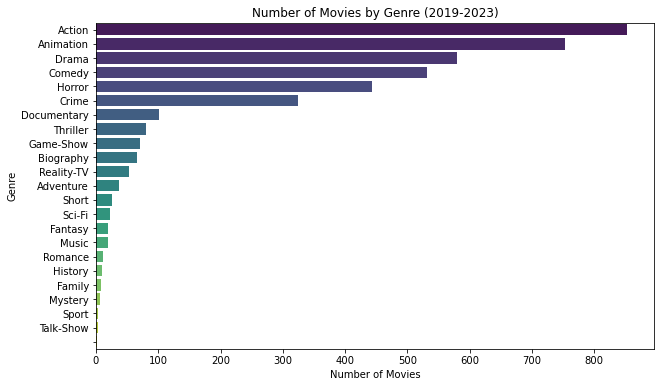

In [14]:
#Plotting Number of movies from year 2019-2023 by Genre

genre_counts = df['Genre_1'].explode().str.strip().value_counts()
genre_unique = df['Genre_1'].explode().str.strip().unique()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts, y=genre_unique,  orient='h', palette='viridis')
plt.ylabel('Genre')
plt.xlabel('Number of Movies')
plt.title('Number of Movies by Genre (2019-2023)')
plt.show()

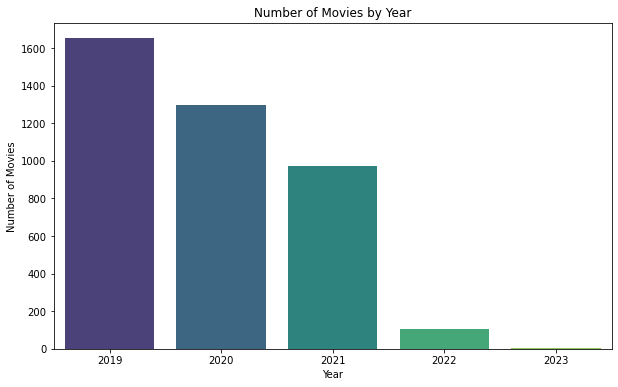

In [15]:
#Plotting the number of movies by year
year_counts = df['Year'].explode().str.strip().value_counts()
year_unique = sorted(df['Year'].explode().str.strip().unique())
plt.figure(figsize=(10,6))
sns.barplot(year_unique, year_counts, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
plt.show()


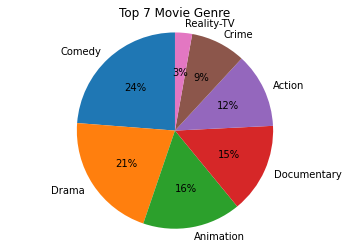

In [16]:
#Making pie chart for the top 7 genre
fig, ax = plt.subplots()
ax.pie(genre_counts[:7], labels = genre_counts[:7].index, autopct='%1.0f%%', startangle = 90)
ax.axis('equal')
ax.set_title('Top 7 Movie Genre')
plt.show()

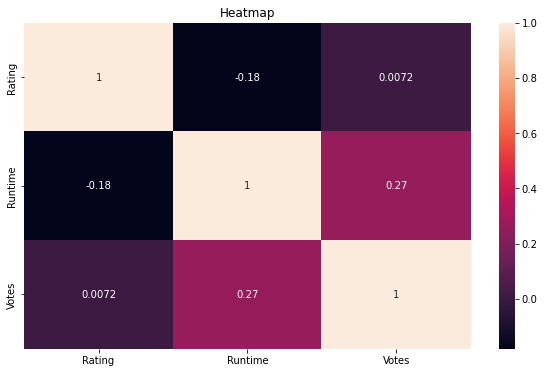

In [18]:
#Heatmap
df_rating = df[['Rating', 'Runtime', 'Votes']]
cor_movie = df_rating.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor_movie, annot=True)
plt.title('Heatmap')
plt.show()
